[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/seap-udea/MultiNEAs/blob/main/examples/multimin_tutorial.ipynb)

# MultiNEAs: The `multimin` Module Tutorial

This notebook demonstrates how to use the `multineas.multimin` module for handling multidimensional distributions, specifically designed for asteroid population analysis.

## Installation

If you're running this in Google Colab or need to install the package, uncomment and run the following cell:

In [1]:
try:
    from google.colab import drive
    %pip install -Uq multineas
except ImportError:
    print("Not running in Colab, skipping installation")

# Uncomment to install from GitHub (development version)
# !pip install git+https://github.com/seap-udea/MultiNEAs.git

Not running in Colab, skipping installation


## Load the Package

Import `multineas.multimin` and other required libraries:

In [2]:
import pandas as pd
import numpy as np
import multineas.multimin as mm
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")
from multineas.util import Util, Stats
from multineas.plot import CornerPlot

Welcome to MultiNEAs v0.2.3


Read data:

In [3]:
df_neas=pd.read_json(Util.get_data("nea_extended.json.gz"))
df_neas["q"]=df_neas["a"]*(1-df_neas["e"])
data_neas=np.array(df_neas[["q","e","i"]])
len(data_neas)

40748

Transform to unbound:

In [4]:
scales=[1.35,1.00,180.0]
udata=np.zeros_like(data_neas)
for i in range(len(data_neas)):
    udata[i]=Util.t_if(data_neas[i],scales,Util.f2u)

Corner plot of data:

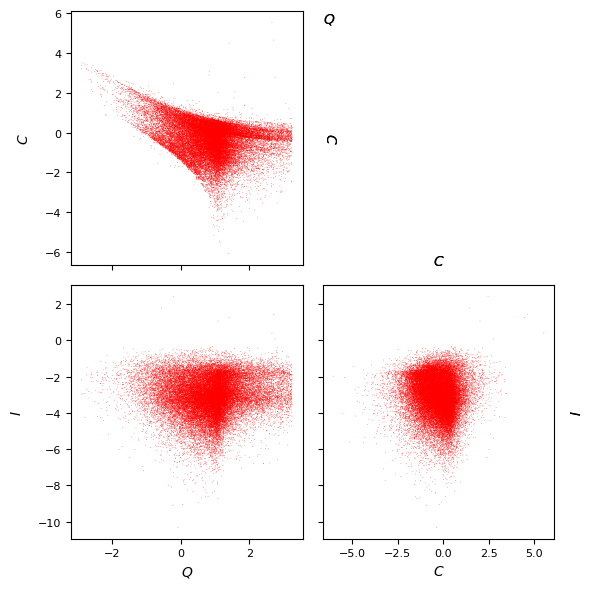

In [5]:
properties=dict(
    Q=dict(label=r"$Q$",range=None),
    E=dict(label=r"$C$",range=None),
    I=dict(label=r"$I$",range=None),
)
G=CornerPlot(properties,figsize=3)

sargs=dict(s=0.2,edgecolor='None',color='r')
hist=G.scatter_plot(udata,**sargs)


You can also make a 2-D histogram:

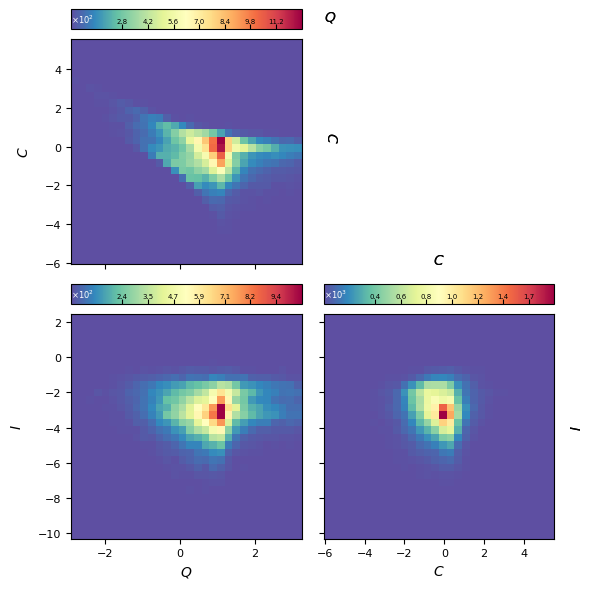

In [6]:
G=CornerPlot(properties,figsize=3)
hargs=dict(bins=30,cmap='Spectral_r')
hist=G.plot_hist(udata,colorbar=True,**hargs)

Create a *Composed multinormal*:

In [7]:
CMND=mm.ComposedMultiVariateNormal(Ngauss=1,Nvars=2)
print(CMND)

Composition of Ngauss = 1 gaussian multivariates of Nvars = 2 random variables:
    Weights: [1.0]
    Number of variables: 2
    Averages (μ): [[0, 0]]
    Standard deviations (σ): [[1.0, 1.0]]
    Correlation coefficients (ρ): [[0.0]]

    Covariant matrices (Σ): 
        [[[1.0, 0.0], [0.0, 1.0]]]
    Flatten parameters: 
        With covariance matrix (6):
            [p1,μ1_1,μ1_2,Σ1_11,Σ1_12,Σ1_22]
            [1.0, 0.0, 0.0, 1.0, 0.0, 1.0]
        With std. and correlations (6):
            [p1,μ1_1,μ1_2,σ1_1,σ1_2,ρ1_12]
            [1.0, 0.0, 0.0, 1.0, 1.0, 0.0]


Generate a sample:

In [8]:
sample = CMND.rvs(10000)

Show sample:

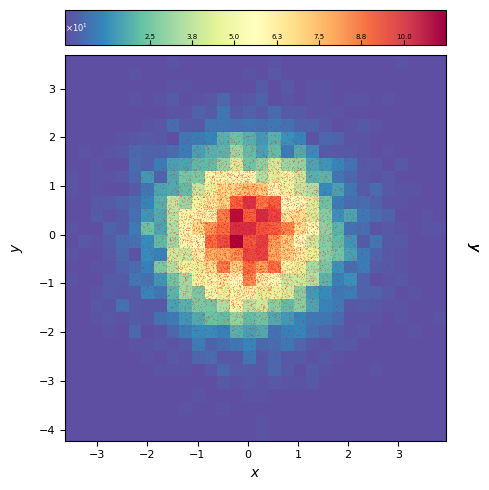

In [9]:
properties=dict(
    x=dict(label=r"$x$",range=None),
    y=dict(label=r"$y$",range=None),
)
G=CornerPlot(properties,figsize=5)

hargs=dict(bins=30,cmap='Spectral_r')
hist=G.plot_hist(sample,colorbar=True,**hargs)

sargs=dict(s=0.2,edgecolor='None',color='r')
hist=G.scatter_plot(sample,**sargs)


Now create a true *composed distribution*:

You may created specifying each parameter:

In [10]:
weights=[0.1,0.9]
mus=[[0,0],[5,5]]
Sigmas=[[[1,0.2],[0,1]],[[1,0],[0,1]]]
MND=mm.ComposedMultiVariateNormal(mus=mus,weights=weights,Sigmas=Sigmas)
print(MND)

Composition of Ngauss = 2 gaussian multivariates of Nvars = 2 random variables:
    Weights: [0.1, 0.9]
    Number of variables: 2
    Averages (μ): [[0, 0], [5, 5]]
    Standard deviations (σ): [[1.0, 1.0], [1.0, 1.0]]
    Correlation coefficients (ρ): [[0.2], [0.0]]

    Covariant matrices (Σ): 
        [[[1.0, 0.2], [0.2, 1.0]], [[1.0, 0.0], [0.0, 1.0]]]
    Flatten parameters: 
        With covariance matrix (12):
            [p1,p2,μ1_1,μ1_2,μ2_1,μ2_2,Σ1_11,Σ1_12,Σ1_22,Σ2_11,Σ2_12,Σ2_22]
            [0.1, 0.9, 0.0, 0.0, 5.0, 5.0, 1.0, 0.2, 1.0, 1.0, 0.0, 1.0]
        With std. and correlations (12):
            [p1,p2,μ1_1,μ1_2,μ2_1,μ2_2,σ1_1,σ1_2,σ2_1,σ2_2,ρ1_12,ρ2_12]
            [0.1, 0.9, 0.0, 0.0, 5.0, 5.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.0]


Or, you may do it using a flat list of parameters:

In [11]:
params=[0.1, 0.9, 0.0, 0.0, 5.0, 5.0, 1.0, 0.2, 1.0, 1.0, 0.0, 1.0]
MND=mm.ComposedMultiVariateNormal(params=params,Nvars=2)
print(MND)

Composition of Ngauss = 2 gaussian multivariates of Nvars = 2 random variables:
    Weights: [0.1, 0.9]
    Number of variables: 2
    Averages (μ): [[0.0, 0.0], [5.0, 5.0]]
    Standard deviations (σ): [[1.0, 1.0], [1.0, 1.0]]
    Correlation coefficients (ρ): [[0.2], [0.0]]

    Covariant matrices (Σ): 
        [[[1.0, 0.2], [0.2, 1.0]], [[1.0, 0.0], [0.0, 1.0]]]
    Flatten parameters: 
        With covariance matrix (12):
            [p1,p2,μ1_1,μ1_2,μ2_1,μ2_2,Σ1_11,Σ1_12,Σ1_22,Σ2_11,Σ2_12,Σ2_22]
            [0.1, 0.9, 0.0, 0.0, 5.0, 5.0, 1.0, 0.2, 1.0, 1.0, 0.0, 1.0]
        With std. and correlations (12):
            [p1,p2,μ1_1,μ1_2,μ2_1,μ2_2,σ1_1,σ1_2,σ2_1,σ2_2,ρ1_12,ρ2_12]
            [0.1, 0.9, 0.0, 0.0, 5.0, 5.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.0]


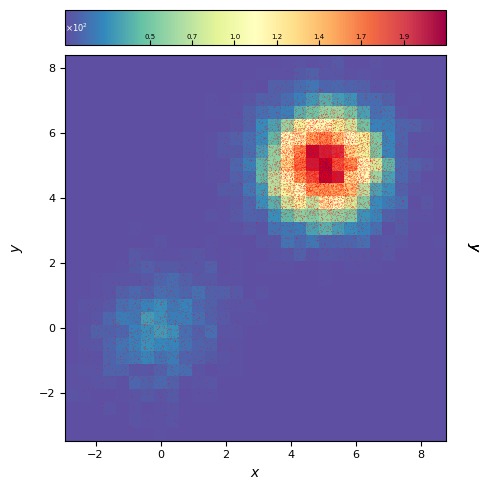

In [12]:
sample = MND.rvs(10000)
properties=dict(
    x=dict(label=r"$x$",range=None),
    y=dict(label=r"$y$",range=None),
)
G=CornerPlot(properties,figsize=5)

hargs=dict(bins=30,cmap='Spectral_r')
hist=G.plot_hist(sample,colorbar=True,**hargs)

sargs=dict(s=0.2,edgecolor='None',color='r')
hist=G.scatter_plot(sample,**sargs)

## Fitting data to a composed multinormal distribution 

Create the fitting object:

In [13]:
F=mm.FitCMND(Ngauss=1,Nvars=3)

The fitting object create a test CMND:

In [14]:
print(F.cmnd)

Composition of Ngauss = 1 gaussian multivariates of Nvars = 3 random variables:
    Weights: [1.0]
    Number of variables: 3
    Averages (μ): [[0, 0, 0]]
    Standard deviations (σ): [[1.0, 1.0, 1.0]]
    Correlation coefficients (ρ): [[0.0, 0.0, 0.0]]

    Covariant matrices (Σ): 
        [[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]]]
    Flatten parameters: 
        With covariance matrix (10):
            [p1,μ1_1,μ1_2,μ1_3,Σ1_11,Σ1_12,Σ1_13,Σ1_22,Σ1_23,Σ1_33]
            [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0]
        With std. and correlations (10):
            [p1,μ1_1,μ1_2,μ1_3,σ1_1,σ1_2,σ1_3,ρ1_12,ρ1_13,ρ1_23]
            [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0]


Let's make a minimization:

In [15]:
t = Util.el_time(0)
F.fit_data(udata,verbose=False,advance=1)
t = Util.el_time()
print(f"-log(L)/N = {F.solution.fun/len(udata)}")

Iterations:
Iter 0:
	Vars: [2.6, 1.7, -1.6, -1.2, -1.1, -1.5, 2.3, 1.7, 1.9]
	LogL/N: 5.46305195119376
Iter 1:
	Vars: [2.5, 1.4, -2.1, -1.2, -1.2, -1.6, 2.2, 1.9, 1.7]
	LogL/N: 5.296934563652492
Iter 2:
	Vars: [2.3, 0.9, -2.3, -1.3, -1.5, -1.7, 2, 1.7, 1.5]
	LogL/N: 5.11914207429286
Iter 3:
	Vars: [0.9, -0.53, -3.1, -1.8, -2.1, -1.9, 0.68, 0.95, 0.95]
	LogL/N: 4.387398619351873
Iter 4:
	Vars: [0.82, -0.49, -3.1, -2.2, -2.2, -2, -0.0026, 0.27, 0.54]
	LogL/N: 4.123540470373277
Iter 5:
	Vars: [0.89, -0.41, -3, -2.4, -2.3, -2.1, -0.59, 0.072, -0.013]
	LogL/N: 3.9805208605955293
Iter 6:
	Vars: [0.9, -0.37, -3, -2.4, -2.3, -2.1, -0.63, 0.09, -0.12]
	LogL/N: 3.9722279175368764
Iter 7:
	Vars: [0.88, -0.35, -3.1, -2.4, -2.3, -2.1, -0.64, 0.086, -0.12]
	LogL/N: 3.970227502307972
Iter 8:
	Vars: [0.85, -0.32, -3.1, -2.4, -2.4, -2.1, -0.65, 0.079, -0.12]
	LogL/N: 3.9691322774090843
Iter 9:
	Vars: [0.85, -0.32, -3.1, -2.4, -2.4, -2.1, -0.65, 0.079, -0.12]
	LogL/N: 3.9691322774090843
Elapsed time sin

Now you may see the result:

In [16]:
print(F.cmnd)

Composition of Ngauss = 1 gaussian multivariates of Nvars = 3 random variables:
    Weights: [1.0]
    Number of variables: 3
    Averages (μ): [[0.8495753569998186, -0.3190900805170545, -3.0682506127352323]]
    Standard deviations (σ): [[0.8564706986092638, 0.8651371705482407, 1.068609714435077]]
    Correlation coefficients (ρ): [[-0.31307211549992053, 0.03948534789770663, -0.06186171300584031]]

    Covariant matrices (Σ): 
        [[[0.7335420575762405, -0.23197536636997793, 0.03613828980598284], [-0.23197536636997793, 0.7484623238642157, -0.057190781561264906], [0.03613828980598284, -0.057190781561264906, 1.1419267217850169]]]
    Flatten parameters: 
        With covariance matrix (10):
            [p1,μ1_1,μ1_2,μ1_3,Σ1_11,Σ1_12,Σ1_13,Σ1_22,Σ1_23,Σ1_33]
            [1.0, 0.8495753569998186, -0.3190900805170545, -3.0682506127352323, 0.7335420575762405, -0.23197536636997793, 0.03613828980598284, 0.7484623238642157, -0.057190781561264906, 1.1419267217850169]
        With std. and c

Let's plot the fit result:_

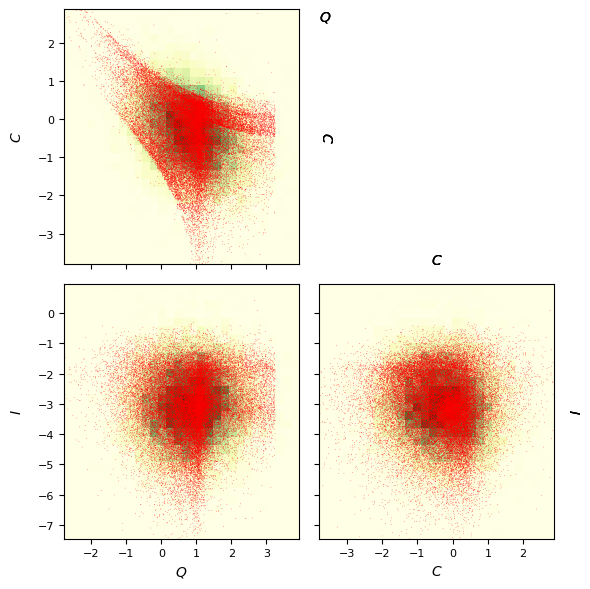

In [17]:
props=["Q","C","I"]
hargs=dict(bins=30,cmap='YlGn')
sargs=dict(s=0.2,edgecolor='None',color='r')
G=F.plot_fit(props=props,hargs=hargs,sargs=sargs,figsize=3)

Since a fitting process may be a very long process it is useful to store the result:

In [18]:
F.save_fit(f"products/fit-single.pkl",useprefix=False)

If you have the result you may load it afterwards here or in another notebook:

In [19]:
!mkdir -p products
F=mm.FitCMND(f"products/fit-single.pkl")
print(F.cmnd)

Composition of Ngauss = 1 gaussian multivariates of Nvars = 3 random variables:
    Weights: [1.0]
    Number of variables: 3
    Averages (μ): [[0.8495753569998186, -0.3190900805170545, -3.0682506127352323]]
    Standard deviations (σ): [[0.8564706986092638, 0.8651371705482407, 1.068609714435077]]
    Correlation coefficients (ρ): [[-0.31307211549992053, 0.03948534789770663, -0.06186171300584031]]

    Covariant matrices (Σ): 
        [[[0.7335420575762405, -0.23197536636997793, 0.03613828980598284], [-0.23197536636997793, 0.7484623238642157, -0.057190781561264906], [0.03613828980598284, -0.057190781561264906, 1.1419267217850169]]]
    Flatten parameters: 
        With covariance matrix (10):
            [p1,μ1_1,μ1_2,μ1_3,Σ1_11,Σ1_12,Σ1_13,Σ1_22,Σ1_23,Σ1_33]
            [1.0, 0.8495753569998186, -0.3190900805170545, -3.0682506127352323, 0.7335420575762405, -0.23197536636997793, 0.03613828980598284, 0.7484623238642157, -0.057190781561264906, 1.1419267217850169]
        With std. and c

Let's try with two MND:

Iterations:
Iter 0:
	Vars: [0.5, 0.5, 2.6, 1.8, -1.7, 2.6, 1.7, -1.6, -1.2, -1.1, -1.6, -1.3, -1.2, -1.5, 2.9, 1.8, 1.9, 1.6, 1.8, 1.7]
	LogL/N: 5.409364962531175
Iter 5:
	Vars: [-75, 0.52, 2.6, 0.051, -3.3, 0.91, -0.38, -3, -1.4, -2.4, -2.3, -2.4, -2.3, -2.1, 2.6, 2.2, 0.66, -0.65, 0.098, -0.14]
	LogL/N: 3.9733026622618435
Iter 8:
	Vars: [-75, 0.52, 2.6, 0.1, -3.2, 0.85, -0.32, -3.1, -1.4, -2.4, -2.3, -2.4, -2.4, -2.1, 2.6, 2.1, 0.7, -0.65, 0.078, -0.12]
	LogL/N: 3.9691426225916655
Elapsed time since last call: 1.12621 s
-log(L)/N = 3.9691426225916655
Composition of Ngauss = 2 gaussian multivariates of Nvars = 3 random variables:
    Weights: [6.171602377618486e-33, 1.0]
    Number of variables: 3
    Averages (μ): [[2.641504782516731, 0.10012887709244929, -3.22596990843152], [0.8496223619321682, -0.321864365311089, -3.070684264743109]]
    Standard deviations (σ): [[1.9670073553900331, 0.8276953094520436, 0.9379219921558019], [0.8564852945226374, 0.8643384737674272, 1.068147654695657

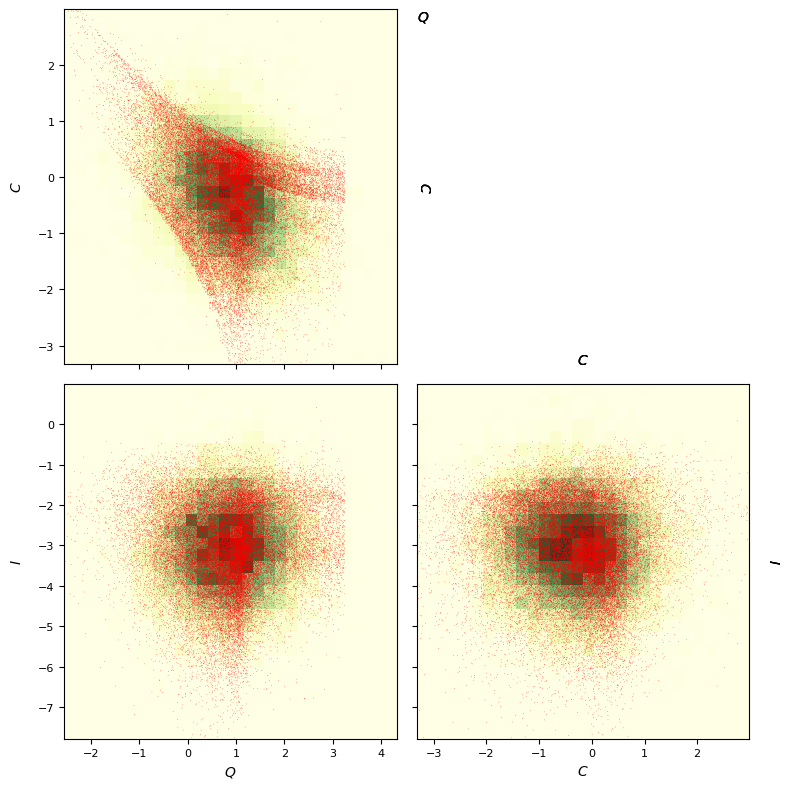

In [20]:
F=mm.FitCMND(Ngauss=2,Nvars=3)

Util.el_time(0)
F.fit_data(udata,advance=5)
Util.el_time()
F.save_fit(f"products/fit-multiple.pkl",useprefix=False)

print(f"-log(L)/N = {F.solution.fun/len(udata)}")
print(F.cmnd)

G=F.plot_fit(figsize=4,
            props=["Q","C","I"],
            hargs=dict(bins=30,cmap='YlGn'),sargs=dict(s=0.2,edgecolor='None',color='r'))
F.fig.savefig(f"products/fit-multiple-{F.prefix}.png")

Notice that by using two multinormals you now obtain a better value of the $\log {\cal L}$.

You can also fit setting bounds in parameters to avoid divergences:

Iterations:
Iter 0:
	Vars: [2.2, 2.2, 2.6, 1.7, -1.7, 2.5, 1.7, -1.6, -1.2, -1.1, -1.6, -1.3, -1.2, -1.5, 2.9, 1.8, 1.9, 1.6, 1.8, 1.7]
	LogL/N: 5.406984610429428
Iter 5:
	Vars: [2, 2, 0.95, -0.49, -3.1, 0.75, -0.096, -3, -2.9, -2.4, -2.3, -2.1, -2.4, -2, -0.19, 0.4, -0.53, -0.93, -0.054, 0.28]
	LogL/N: 3.917515047984334
Iter 10:
	Vars: [0.67, 2, 0.84, -0.74, -3.5, 0.88, -0.011, -2.8, -3, -2.3, -2, -2.1, -2.6, -2.3, -0.32, 0.39, -0.65, -1.1, -0.048, -0.24]
	LogL/N: 3.8617616877162697
Iter 11:
	Vars: [0.67, 2, 0.84, -0.74, -3.5, 0.88, -0.011, -2.8, -3, -2.3, -2, -2.1, -2.6, -2.3, -0.32, 0.39, -0.65, -1.1, -0.048, -0.24]
	LogL/N: 3.8617616877162697
Elapsed time since last call: 3.57229 s
-log(L)/N = 3.8617616877162697
Composition of Ngauss = 2 gaussian multivariates of Nvars = 3 random variables:
    Weights: [0.42835874635688376, 0.5716412536431162]
    Number of variables: 3
    Averages (μ): [[0.8365875810029818, -0.7431808879382713, -3.4571138539446906], [0.8754682593761033, -0.01064

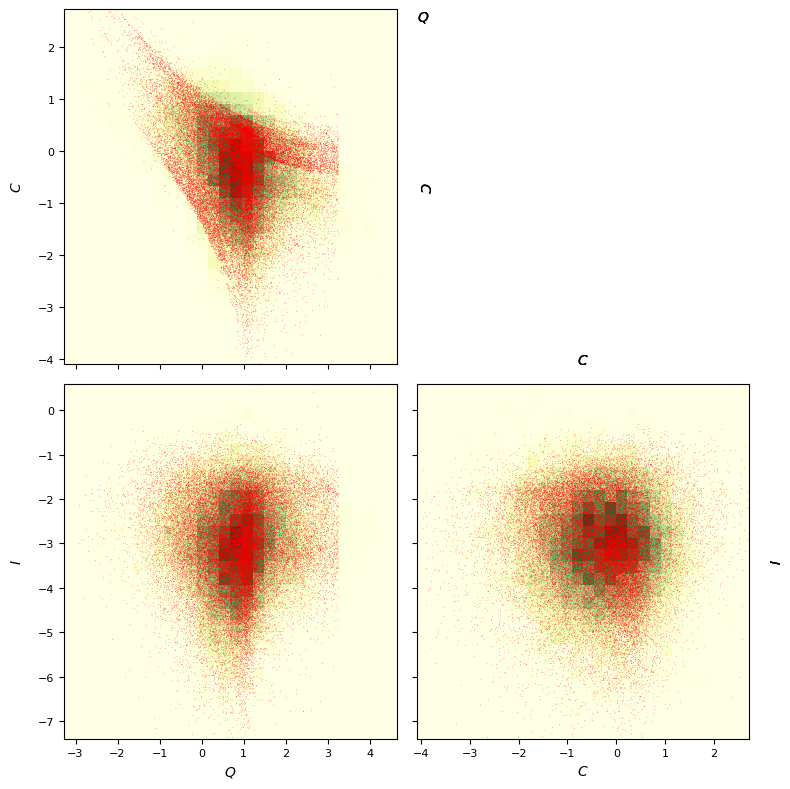

In [21]:
F=mm.FitCMND(Ngauss=2,Nvars=3)
bounds=F.set_bounds(boundsm=((-2,4),(-4,3),(-7,0)),boundw=(0.1,0.9))

Util.el_time(0)
F.fit_data(udata,advance=5,bounds=bounds)
Util.el_time()
F.save_fit(f"products/fit-multiple-bounds.pkl",useprefix=False)

print(f"-log(L)/N = {F.solution.fun/len(udata)}")
print(F.cmnd)
G=F.plot_fit(figsize=4,
            props=["Q","C","I"],
            hargs=dict(bins=30,cmap='YlGn'),sargs=dict(s=0.2,edgecolor='None',color='r'))
F.fig.savefig(f"products/fit-multiple-bounds-{F.prefix}.png")

Five gaussians:

Iterations:
Iter 0:
	Vars: [2.2, 2.2, 2.2, 2.2, 2.2, 2.6, 1.8, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.6, 2.5, 1.7, -1.6, -1.3, -1.2, -1.7, -1.3, -1.2, -1.6, -1.4, -1.3, -1.5, -1.4, -1.3, -1.5, -1.4, -1.3, -1.4, 3.6, 1.7, 1.9, 2.5, 2.3, 2.1, 2, 2.1, 1.9, 1.6, 1.6, 1.7, 1.6, 1.6, 1.6]
	LogL/N: 5.386360076834422
Iter 10:
	Vars: [-0.7, 0.17, -1, -0.22, -0.48, 1.6, -0.1, -3.1, 1, -0.77, -2.7, 1.3, -1, -3.7, 0.8, 0.35, -3.5, -0.23, -0.15, -2.7, -2.3, -3.5, -2.4, -3.3, -2.7, -2.4, -2.5, -2.3, -1.8, -2.8, -3.4, -2.2, -2.7, -2.1, -2.3, -0.059, 0.38, 0.51, -0.22, 0.51, -0.23, -0.24, 1.5, -0.4, -1.7, -0.026, 0.31, -2.3, -0.095, 0.21]
	LogL/N: 3.7360435356477963
Iter 16:
	Vars: [-0.76, 0.37, -1.3, -0.64, -0.15, 1.6, 0.066, -3.1, 1, -0.62, -2.8, 1.4, -0.79, -3.6, 0.68, 0.41, -3.6, -0.0011, -0.53, -2.7, -2.4, -3.6, -2.5, -3.3, -2.8, -2.3, -2.4, -2.5, -1.7, -2.8, -3.3, -2.1, -2.5, -2, -2.3, -0.94, 0.35, 0.48, -0.62, 0.6, -0.41, -0.25, 1.7, -0.098, -2.1, -0.2, 0.32, -2.5, -0.12, 0.31]
	Log

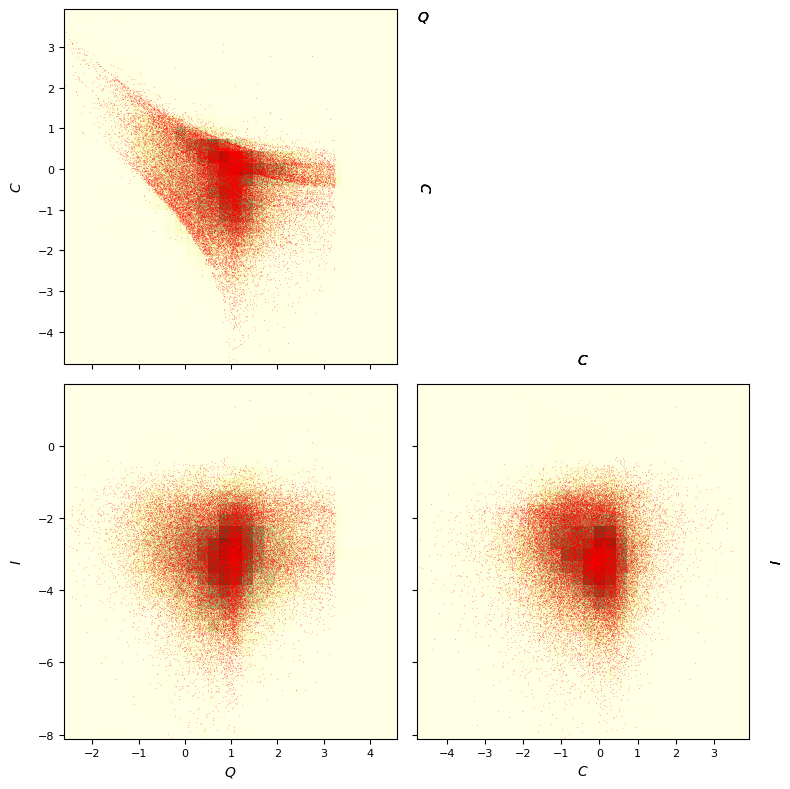

In [22]:
F=mm.FitCMND(Ngauss=5,Nvars=3)
bounds=F.set_bounds(boundsm=((-2,4),(-4,3),(-7,0)),boundw=(0.1,0.9))

Util.el_time(0)
F.fit_data(udata,advance=10,bounds=bounds)
Util.el_time()
F.save_fit(f"products/fit-multiple-bound_mus.pkl",useprefix=False)

print(f"-log(L)/N = {F.solution.fun/len(udata)}")
print(F.cmnd)
G=F.plot_fit(figsize=4,
            props=["Q","C","I"],
            hargs=dict(bins=30,cmap='YlGn'),sargs=dict(s=0.2,edgecolor='None',color='r'))
F.fig.savefig(f"products/fit-multiple-bound_mus-{F.prefix}.png")

As you can see the fitting parameter $-\log{\cal L}$ is improved with respect to previous fit. 

You can verify that the fit is capturing the details of the distribution by generating and plotting a mock distribution:

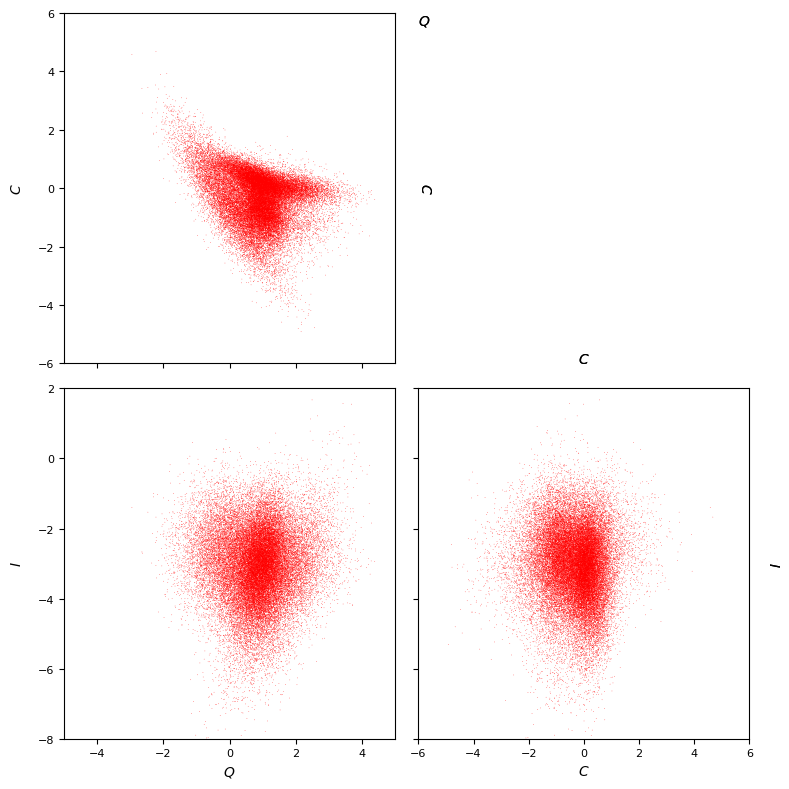

In [23]:
F.cmnd.plot_sample(N=len(F.data),
                  figsize=4,
                  props=["Q","C","I"],ranges=[[-5,5],[-6,6],[-8,2]],
                  sargs=dict(s=0.2,edgecolor='None',color='r'))
G.fig.savefig(f"products/sample-multiple-{F.prefix}.png")

Compare this with the original distribution:

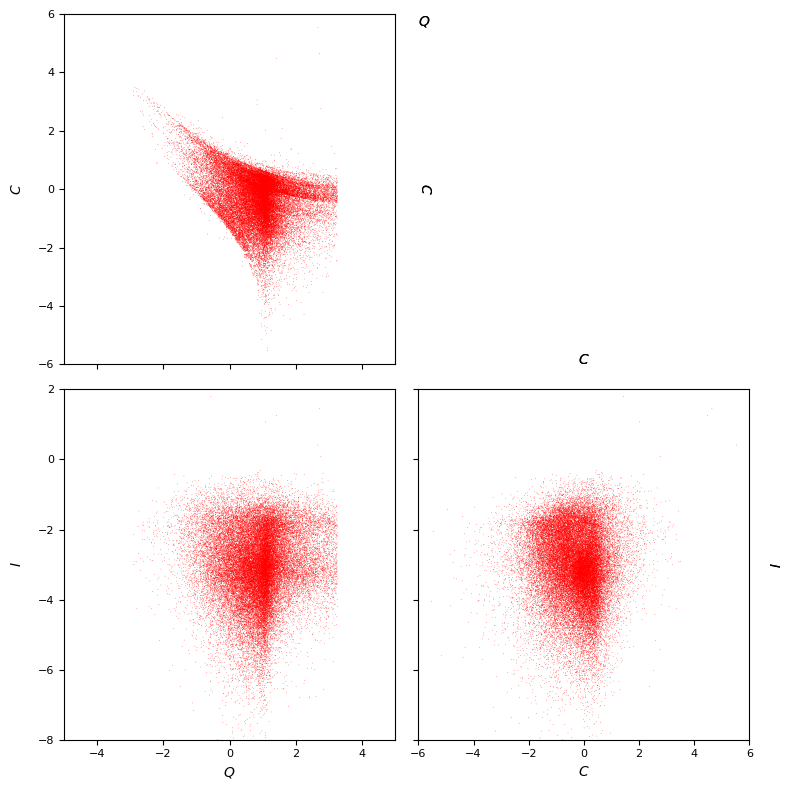

In [24]:
properties=dict(
    Q=dict(label=r"$Q$",range=[-5,5]),
    C=dict(label=r"$C$",range=[-6,6]),
    I=dict(label=r"$I$",range=[-8,2]),
)
G=CornerPlot(properties,figsize=4)
sargs=dict(s=0.2,edgecolor='None',color='r')
hist=G.scatter_plot(udata,**sargs)
G.fig.savefig("products/true-MPCsample.png")

Let's try with 20 MND:

Iterations:
Iter 0:
	Vars: [2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.6, 1.8, -1.7, 2.6, 1.8, -1.7, 2.6, 1.8, -1.7, 2.6, 1.8, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.7, 2.6, 1.7, -1.6, 2.6, 1.7, -1.6, 2.6, 1.7, -1.6, 2.5, 1.7, -1.6, 2.5, 1.7, -1.6, -1.4, -1.2, -1.9, -1.3, -1.2, -1.8, -1.4, -1.3, -1.8, -1.4, -1.3, -1.7, -1.4, -1.3, -1.7, -1.4, -1.3, -1.7, -1.4, -1.3, -1.6, -1.4, -1.3, -1.6, -1.4, -1.3, -1.6, -1.4, -1.3, -1.6, -1.4, -1.3, -1.6, -1.4, -1.3, -1.6, -1.4, -1.3, -1.6, -1.4, -1.3, -1.5, -1.4, -1.3, -1.5, -1.4, -1.3, -1.8, -1.4, -1.4, -1.3, -1.4, -1.3, -1.9, -1.4, -1.4, -1.2, -1.4, -1.3, -3.4, 4.8, 1.6, 1.7, 3.9, 1.7, 1.9, 3.4, 1.9, 2.2, 3.1, 2.1, 2.2, 2.8, 2.3, 2.3, 2.6, 2.5, 2.2, 2.4, 2.6, 2.2, 2.3, 2.4, 2.1, 2.1, 2.3, 2, 2, 2.1, 2, 1.8, 1.9, 1.9, 1.7, 1.8, 1.9, 1.7, 1.7, 1.8, 1.6

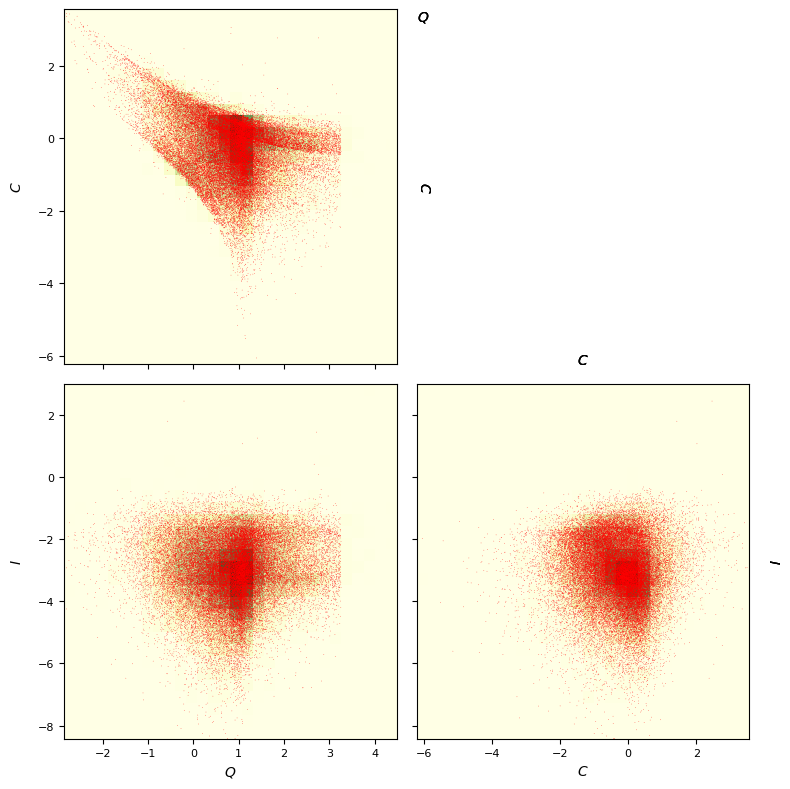

In [25]:
F=mm.FitCMND(Ngauss=20,Nvars=3)
bounds=F.set_bounds(boundsm=((-2,4),(-4,3),(-7,0)),boundw=(0.1,0.9))

Util.el_time(0)
F.fit_data(udata,advance=10,bounds=bounds)
Util.el_time()
F.save_fit(f"products/fit-multiple-bound_mus.pkl",useprefix=True)

print(f"-log(L)/N = {F.solution.fun/len(udata)}")
print(F.cmnd)
G=F.plot_fit(figsize=4,
            props=["Q","C","I"],
            hargs=dict(bins=30,cmap='YlGn'),sargs=dict(s=0.2,edgecolor='None',color='r'))
F.fig.savefig(f"products/fit-multiple-bound_mus-{F.prefix}.png")

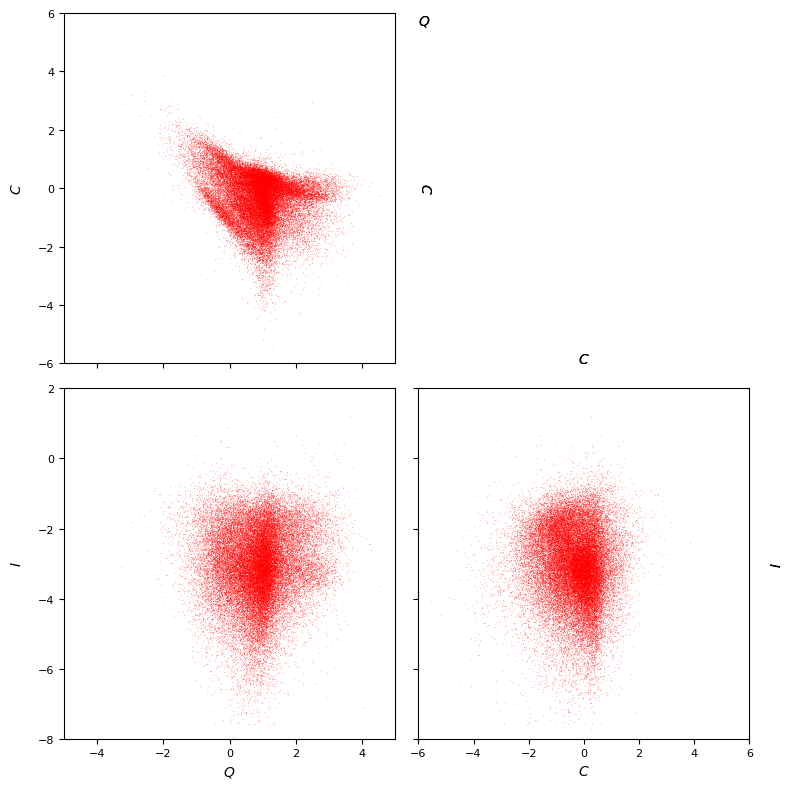

In [26]:
F.cmnd.plot_sample(N=len(F.data),
                  figsize=4,
                  props=["Q","C","I"],ranges=[[-5,5],[-6,6],[-8,2]],
                  sargs=dict(s=0.2,edgecolor='None',color='r'))
G.fig.savefig(f"products/sample-multiple-{F.prefix}.png")

---

**MultiNEAs** - Numerical tools for near-earth asteroid dynamics and population

© 2026 Jorge I. Zuluaga and Juanita A. Agudelo